# ECO491: Homework 1

In [214]:
# Relevant basic Python libraries

import pandas as pd   # Excel sheet manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Histograms and bar charts
import seaborn as sns  # Visualizations
from scipy.stats import norm, ttest_1samp
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

In [224]:
# Question 1 Coding Portion Setup

df_BAC = pd.read_excel("../data/BAC_2010_2024.xlsx").set_index("Date")
df_SPY = pd.read_excel("../data/SPY_2010_2024.xlsx").set_index("Date")

df_returns = pd.merge(df_BAC, df_SPY, left_index=True, right_index=True)

df_returns = df_returns.rename(columns={"Close Price_x": "BAC", "Close Price_y": "SPY"})

df_returns["BAC Daily Returns"] = np.log(df_returns["BAC"] / df_returns["BAC"].shift(1))
df_returns["SPY Daily Returns"] = np.log(df_returns["SPY"] / df_returns["SPY"].shift(1))

df_returns = df_returns.dropna(subset=["BAC Daily Returns", "SPY Daily Returns"])

print(df_returns)

                  BAC      SPY  BAC Daily Returns  SPY Daily Returns
Date                                                                
2010-01-05  16.200001  1136.52           0.031988           0.003111
2010-01-06  16.389999  1137.14           0.011660           0.000545
2010-01-07  16.930000  1141.69           0.032416           0.003993
2010-01-08  16.780001  1144.98          -0.008899           0.002878
2010-01-11  16.930000  1146.98           0.008899           0.001745
...               ...      ...                ...                ...
2024-12-24  44.380001  6040.04           0.011102           0.010982
2024-12-26  44.549999  6037.59           0.003823          -0.000406
2024-12-27  44.340000  5970.84          -0.004725          -0.011117
2024-12-30  43.910000  5906.94          -0.009745          -0.010760
2024-12-31  43.950001  5881.63           0.000911          -0.004294

[3773 rows x 4 columns]


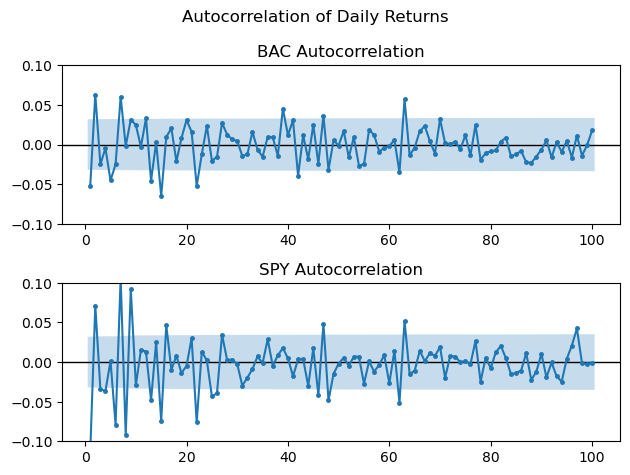

In [225]:
# Question 1: Stylized Fact 1
fig, (ax1_1, ax1_2) = plt.subplots(2)
fig.suptitle("Autocorrelation of Daily Returns")

ax1_1.axhline(0, color="black", linewidth=1)
ax1_2.axhline(0, color="black", linewidth=1)

plot_acf(df_returns["BAC Daily Returns"],ax=ax1_1,lags=100,title="BAC Autocorrelation", zero=False, use_vlines=False, marker='.', linestyle="-")
ax1_1.set_ylim(-0.10, 0.10) 

plot_acf(df_returns["SPY Daily Returns"],ax=ax1_2,lags=100,title="SPY Autocorrelation", zero=False, use_vlines=False, marker='.', linestyle="-")
ax1_2.set_ylim(-0.10, 0.10) 
plt.tight_layout()
plt.show()

The autocorrelation of SPY seems to be higher compared to BAC, though both of their ACFs tend to quickly fall into the region of statistical insignificance. A possible reason is that the market is more stable and consistently grows, which the SPY is far more parallel to due to its holding of many of the major market movers, compared to BAC, though the general trend of little autocorrelation and randomness is shared between the two.

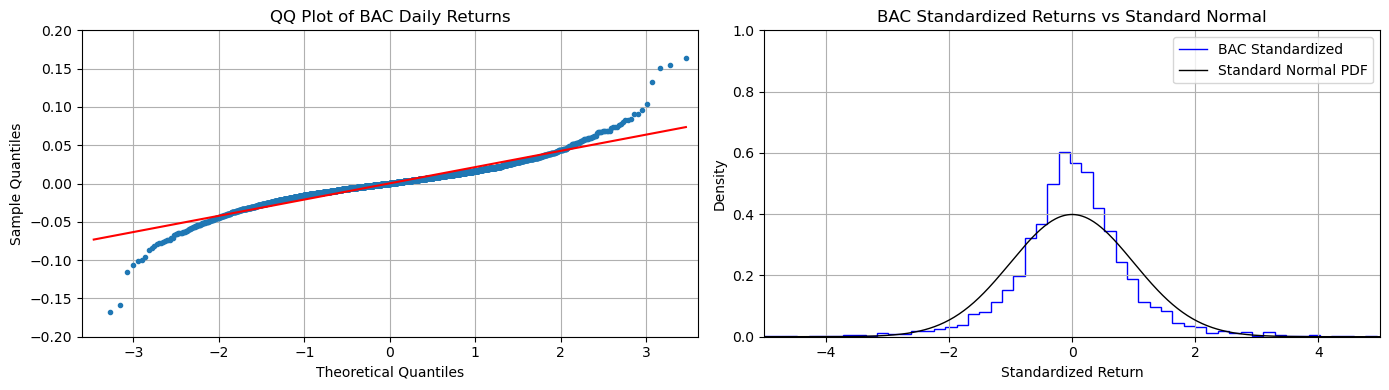

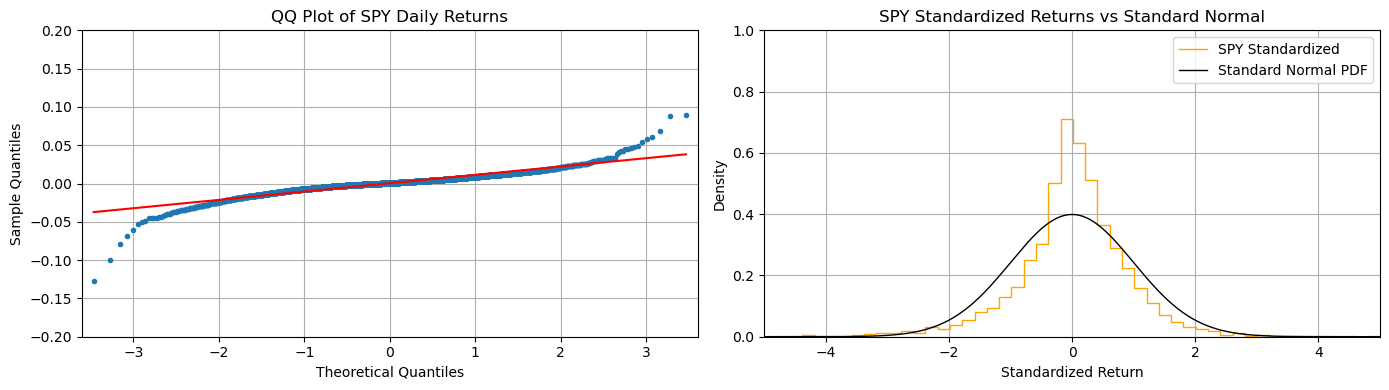

In [226]:
# Question 1: Stylized Fact 2
BAC_standardized = (df_returns["BAC Daily Returns"] - df_returns["BAC Daily Returns"].mean()) / df_returns["BAC Daily Returns"].std()
SPY_standardized = (df_returns["SPY Daily Returns"] - df_returns["SPY Daily Returns"].mean()) / df_returns["SPY Daily Returns"].std()

x = np.linspace(-5, 5, 500)
standard_normal_pdf = norm.pdf(x, loc=0, scale=1)

fig_BAC, (ax_BAC1, ax_BAC2) = plt.subplots(1, 2, figsize=(14, 4))

qqplot(df_returns["BAC Daily Returns"], line='s', ax=ax_BAC1, marker=".")
ax_BAC1.set_title("QQ Plot of BAC Daily Returns")
ax_BAC1.set_ylim(-.2, .2)
ax_BAC1.grid(True)

counts_bac, bins_bac = np.histogram(BAC_standardized, bins=100, density=True)
ax_BAC2.stairs(counts_bac, bins_bac, label="BAC Standardized", color="blue")
ax_BAC2.plot(x, standard_normal_pdf, label="Standard Normal PDF", color="black", linestyle="-", linewidth=1)
ax_BAC2.set_title("BAC Standardized Returns vs Standard Normal")
ax_BAC2.set_xlabel("Standardized Return")
ax_BAC2.set_ylabel("Density")
ax_BAC2.legend()
ax_BAC2.grid(True)
ax_BAC2.set_xlim(-5, 5)
ax_BAC2.set_ylim(0, 1)
plt.tight_layout()
plt.show()

x = np.linspace(-5, 5, 500)
standard_normal_pdf = norm.pdf(x, loc=0, scale=1)

fig, (ax_SPY2, ax_SPY1) = plt.subplots(1, 2, figsize=(14, 4))

qqplot(df_returns["SPY Daily Returns"], line='s', ax=ax_SPY2, marker=".")
ax_SPY2.set_title("QQ Plot of SPY Daily Returns")
ax_SPY2.set_ylim(-.2, .2)
ax_SPY2.grid(True)

counts_spy, bins_spy = np.histogram(SPY_standardized, bins=100, density=True)
ax_SPY1.stairs(counts_spy, bins_spy, label="SPY Standardized", color="orange")
ax_SPY1.plot(x, standard_normal_pdf, label="Standard Normal PDF", color="black", linestyle="-", linewidth=1)
ax_SPY1.set_title("SPY Standardized Returns vs Standard Normal")
ax_SPY1.set_xlabel("Standardized Return")
ax_SPY1.set_ylabel("Density")
ax_SPY1.legend()
ax_SPY1.grid(True)
ax_SPY1.set_xlim(-5, 5)
ax_SPY1.set_ylim(0, 1)

plt.tight_layout()
plt.show()

The QQ graphs show that the distributions are non-normal, even after attempted "normalization," as shown by their trailing tails. Additionally, the two distributions seem to be different with BAC having more extreme values as shown by the the larger spread compared to SPY which has a lower spread. Overall, this is intuitive since a single stock will be more susceptible to extreme return days. The relative non-normality is roughly similar between both stock return distributions, with generally fatter tails and non-normality.

In [227]:
# Question 1: Stylized Fact 3
print("BAC skewness:", df_returns["BAC Daily Returns"].skew())
print("SPY skewness:", df_returns["SPY Daily Returns"].skew())

BAC skewness: -0.2654858632199974
SPY skewness: -0.7259663681795256


SPY's skewness in the negative direction is much higher than BAC, probably due to the fact that SPY is quite adjacent to the market and therefore most susceptible to large market risks that affect many assets manifesting in the stylized fact of time varying correlation. Then all of the stocks contained in the SPY crash at the same time, resulting in large negative skew. Recall the **leverage effect** from the list of stylized facts about stocks.

In [228]:
# Question 1: Stylized Fact 4
print(f"BAC Mean: {df_returns["BAC Daily Returns"].mean():.5f}\nBAC Standard Deviation: {df_returns["BAC Daily Returns"].std():.5f}")
print(f"SPY Mean: {df_returns["SPY Daily Returns"].mean():.5f}\nSPY Standard Deviation: {df_returns["SPY Daily Returns"].std():.5f} \n")

BAC_t_stat, BAC_p_val = ttest_1samp(df_returns["BAC Daily Returns"], 0, alternative="two-sided")
SPY_t_stat, SPY_p_val = ttest_1samp(df_returns["SPY Daily Returns"], 0, alternative="two-sided")

print("BAC t-statistic:", BAC_t_stat)
print("BAC p-value:", BAC_p_val, "\n")

print("SPY t-statistic:", SPY_t_stat)
print("SPY p-value:", SPY_p_val)

BAC Mean: 0.00027
BAC Standard Deviation: 0.02119
SPY Mean: 0.00044
SPY Standard Deviation: 0.01089 

BAC t-statistic: 0.791275265163054
BAC p-value: 0.42883313033576587 

SPY t-statistic: 2.4625088545810256
SPY p-value: 0.013841259998255426


The means are observably dominated by the standard deviation, and in regards to BAC, the mean was confirmed by t-test that one could not reject the null hypothesis of the mean being 0. Surprisingly, though, SPY had a statistically significant mean, suggesting that there is some recognizable trend in return. SPY is a broad indicator for the market and contains many stocks, as mentioned above, and could possibly show that broad assets trend in the same general direction as the market more than a single stock, ex. BAC, trends in a certain direction.

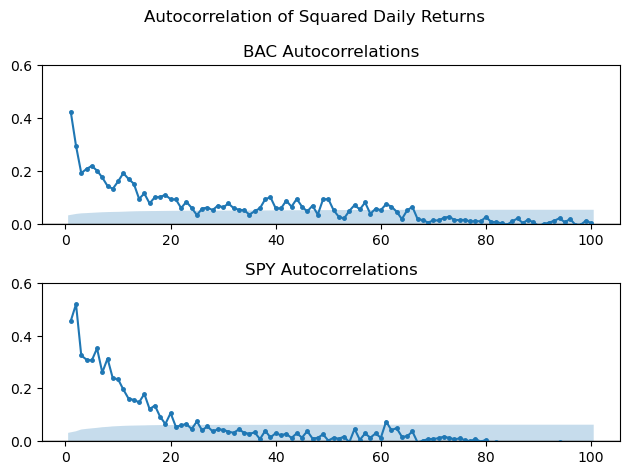

In [229]:
# Question 1: Stylized Fact 5
df_returns["BAC Daily Returns Squared"] = np.square(df_returns["BAC Daily Returns"])
df_returns["SPY Daily Returns Squared"] = np.square(df_returns["SPY Daily Returns"])

fig_squared, (ax_squared, ax_squared2) = plt.subplots(2)
fig_squared.suptitle("Autocorrelation of Squared Daily Returns")

ax_squared.axhline(0, color="black", linewidth=1)
ax_squared2.axhline(0, color="black", linewidth=1)

plot_acf(df_returns["BAC Daily Returns Squared"],ax=ax_squared,lags=100,title="BAC Autocorrelations", zero=False, use_vlines=False, marker='.', linestyle="-")
ax_squared.set_ylim(0, 0.6) 

plot_acf(df_returns["SPY Daily Returns Squared"],ax=ax_squared2,lags=100,title="SPY Autocorrelations", zero=False, use_vlines=False, marker='.', linestyle="-")
ax_squared2.set_ylim(0, 0.6) 
plt.tight_layout()
plt.show()

The variance of SPY dies off quickly, in comparison to BAC, which starts at a lower point but has a lower negative slope. Additionally, both of them have autocorrelations that remain significant for an extended portion of time, compared to the autocorrelations of return shown in the ACF graphs in the first part.

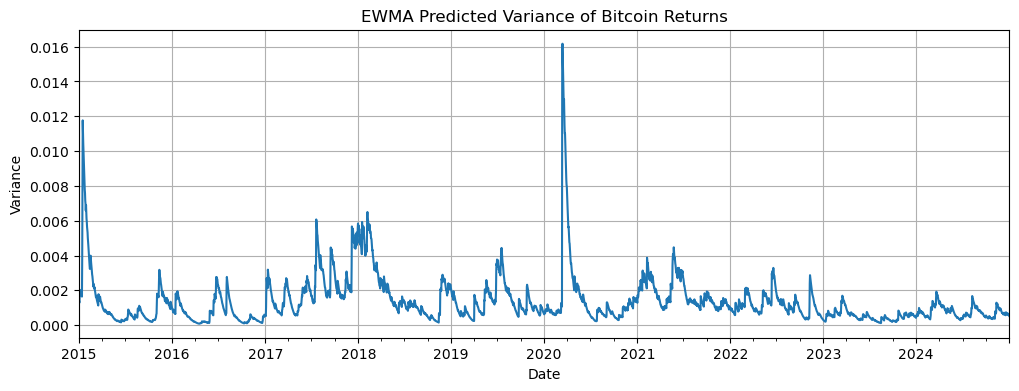

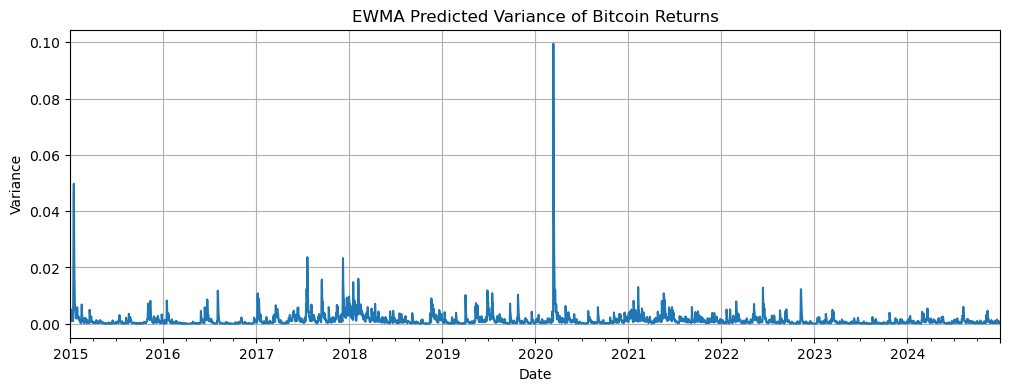

In [230]:
# Question 2 Coding Portion Setup

df_BC = pd.read_excel("../data/Bitcoin.xlsx").set_index("Date")
df_BC["Bitcoin Daily Returns"] = (np.log(df_BC["Price"] / df_BC["Price"].shift(1))).fillna(0)

# Case 1 (a=0.94)
a = 0.94

initial_variance = df_BC["Bitcoin Daily Returns"].var()
predicted_variance = [initial_variance]

for r in df_BC["Bitcoin Daily Returns"][1:]:
  prev_var = predicted_variance[-1]
  new_var = a * prev_var + (1 - a) * r**2
  predicted_variance.append(new_var)

df_BC["Predicted Variance Case 1"] = predicted_variance

df_BC["Predicted Variance Case 1"].plot(title="EWMA Predicted Variance of Bitcoin Returns", figsize=(12, 4))
plt.xlabel("Date")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

# Case 2 (a=0.6)
a = .6
predicted_variance = [initial_variance]

for r in df_BC["Bitcoin Daily Returns"][1:]:
  prev_var = predicted_variance[-1]
  new_var = a * prev_var + (1 - a) * r**2
  predicted_variance.append(new_var)

df_BC["Predicted Variance Case 2"] = predicted_variance

df_BC["Predicted Variance Case 2"].plot(title="EWMA Predicted Variance of Bitcoin Returns", figsize=(12, 4))
plt.xlabel("Date")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

Just based on the coefficients for the two formulas, it is apparent that the first EWMA quation has a far higher weight on variance and much less on return, meaning that a large return won't effect the future variance much. On the other hand, the second EWMA equation shows a much larger weight in returns, which is clear to translate to higher variance values. Since variance leads to time persistence, it makes sense that the variability of variance is not extreme with the time persistence term is weighted highly, compared to when it is not.